## Need for Search Tools in LLM
- In the real world, data is continually growing.
- Develop systems that can answer questions or contexts they were not specifically trained on.

**How the Search Tool Works**
- Break down the query into smaller steps with the goal of solving the overall query.
- For each sub-query, retrieve the source information using search tools.
- Score and filter the information, returning the top-k most relevant documents.
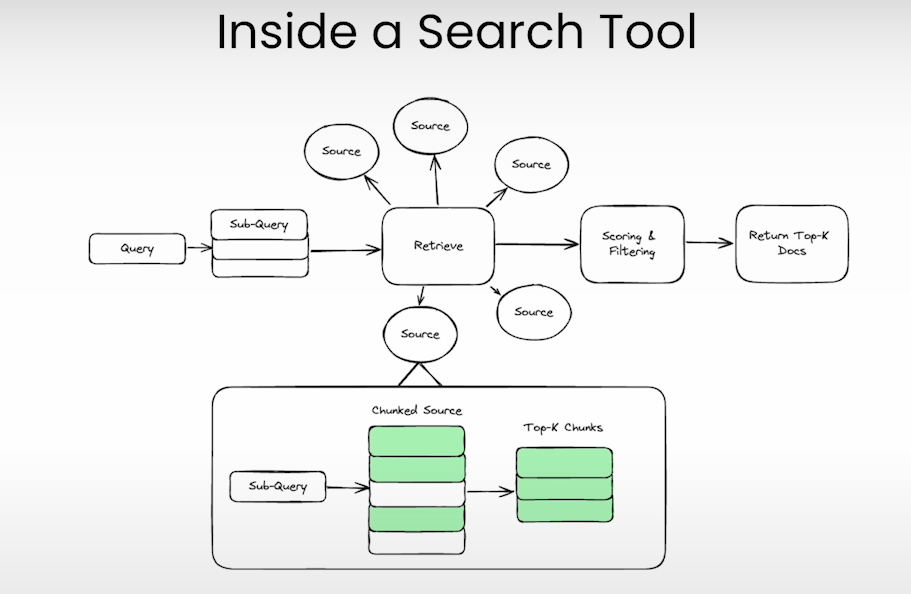

Reference: 
- [Tavily AI](https://docs.tavily.com/)
- [DuckDuckGo Search - PyPI](https://pypi.org/project/duckduckgo-search/)

In [1]:
!pip install duckduckgo-search -q

In [2]:
import os
from tavily import TavilyClient

from dotenv import load_dotenv

# load dotenv
load_dotenv()

True

#### Run Search using Tavily

In [3]:
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))
result = client.search("What is in Nvidia's new Blackwell GPU?", include_answer=True)

# print the answer
result["answer"]

"The Nvidia Blackwell GPU architecture is the successor to the Hopper and Ada Lovelace microarchitectures. This new architecture is designed to deliver significantly improved performance, notably supporting real-time generative AI on trillion-parameter LLMs with up to 25 times the performance and energy efficiency compared to its predecessor. The Blackwell GPUs are in high demand and are expected to further solidify Nvidia's presence in the AI processor market, with features such as AI-based preventative maintenance capabilities for diagnostics and reliability forecasting."

#### Regular Search using DuckduckGo

In [4]:
city = "San Francisco"

query = f"""
What is the current weather in {city}?
Should I travel there today?
"weather.com"
"""

In [5]:
import re
import requests

from bs4 import BeautifulSoup
from duckduckgo_search import DDGS

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as err:
        print("Returning the hardcoded results due to exception reaching the DuckDuckGo Search")
        results = [
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results


for i in search(query):
    print(i)

https://www.accuweather.com/en/us/san-francisco/94103/current-weather/347629
https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629
https://www.timeanddate.com/weather/usa/san-francisco
https://www.foxweather.com/local-weather/california/san-francisco
https://forecast.weather.gov/MapClick.php?lon=-122.44778&lat=37.75156
https://www.accuweather.com/en/us/san-francisco-international-airport/94128/weather-forecast/7618_poi


In [6]:
def scrape_weather_info(url):
    '''
    Scrape content from the given URL
    '''
    if not url:
        return "Weather information could not be found"
    # fetch data
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."
    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

In [7]:
# USE DuckduckGo to find websites and take the first result
url = search(query)[0]

# scrape first website
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:500])

Website: https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629


<body class="three-day ads-not-loaded has-alerts full-animation rfphrase-disabled">
<div class="template-root" style="display:none">
<div class="basic-header has-alerts" style="visibility: hidden;">
<a class="pwa-top-banner" href="/pwa">
<svg class="arrow-icon" height="18" viewbox="0 0 18 18" width="18" xmlns="http://www.w3.org/2000/svg"><defs><path d="m8.495.505 5 5v.99l-5 5-.99-.99 3.805-3.806L0 6.7V5.3l11.31-.001-3.805-3.804.99-.99z" id="a"></path></defs><use fill="#fff" fill-rule="nonzero" t


#### Extract text from the response

In [8]:
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r"\s+", " ", weather_data)

print(f"Website: {url}\n\n")
print(weather_data)

Website: https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629


San Francisco, CA San Francisco California Around the Globe Around the Globe Hurricane Tracker Severe Weather Radar & Maps News & Features Astronomy Business Climate Health Recreation Sports Travel Video Winter Center Today Today's Weather Wed, Jan 1 Partly sunny Hi: 14° Tonight: Mostly cloudy Lo: 9° Current Weather 12:07 AM Looking Ahead Expect rainy weather Friday morning through Friday evening San Francisco Weather Radar & Maps Hourly Weather 10-Day Weather Forecast Today 1/1 Partly sunny Night: Mostly cloudy Thu 1/2 Partly sunny Increasing cloudiness Fri 1/3 Periods of rain A couple of evening showers Sat 1/4 Sun through high clouds Partly cloudy Sun 1/5 Abundant sunshine Increasing clouds Mon 1/6 Clearing Partly cloudy Tue 1/7 Mostly sunny Clear to partly cloudy Wed 1/8 Mostly sunny Clear to partly cloudy Thu 1/9 Sunshine Clear Fri 1/10 Sunshine Partly cloudy Sun & Moon Air Quality The air has

#### Agentic Search

In [9]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1735717892, 'localtime': '2024-12-31 23:51'}, 'current': {'last_updated_epoch': 1735717500, 'last_updated': '2024-12-31 23:45', 'temp_c': 8.3, 'temp_f': 46.9, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 295, 'wind_dir': 'WNW', 'pressure_mb': 1024.0, 'pressure_in': 30.23, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 25, 'feelslike_c': 7.0, 'feelslike_f': 44.7, 'windchill_c': 8.5, 'windchill_f': 47.3, 'heatindex_c': 8.8, 'heatindex_f': 47.9, 'dewpoint_c': 8.5, 'dewpoint_f': 47.2, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 7.6, 'gust_kph': 12.2}}


In [10]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))


# JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)

{
    "location": {
        "name": "San Francisco",
        "region": "California",
        "country": "United States of America",
        "lat": 37.775,
        "lon": -122.4183,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1735717892,
        "localtime": "2024-12-31 23:51"
    },
    "current": {
        "last_updated_epoch": 1735717500,
        "last_updated": "2024-12-31 23:45",
        "temp_c": 8.3,
        "temp_f": 46.9,
        "is_day": 0,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/night/116.png",
            "code": 1003
        },
        "wind_mph": 4.9,
        "wind_kph": 7.9,
        "wind_degree": 295,
        "wind_dir": "WNW",
        "pressure_mb": 1024.0,
        "pressure_in": 30.23,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 80,
        "cloud": 25,
        "feelslike_c": 7.0,
        "feelslike_f": 44.7,
        "windchill_c": 8.5,
      